# Charger et prétraiter l'image

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

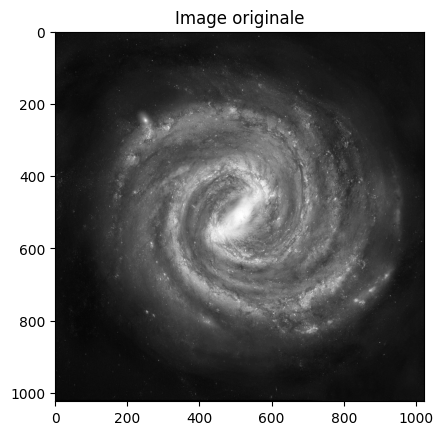

In [18]:
image_path = '/content/milky-way.jpg'
image = cv2.imread(image_path)

#Convertir l'image en niveaux de gris
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.title('Image originale')
plt.show()
#Reshape de l'image en 1D pour l'utiliser avec FCM
pixels = gray_image.reshape(-1, 1)  #Convertir l'image en une liste de pixels


# Initialisation de la matrice d'appartenance

In [19]:
#Paramètres de l'algorithme FCM
m = 2  #Exposant de flou
n_clusters = 3  #Nombre de clusters (ajustez selon vos besoins)
max_iter = 50  #Limite du nombre d'itérations pour accélérer la convergence
epsilon = 1e-4  #Critère d'arrêt ajusté pour une convergence plus rapide

def initialize_membership_matrix(n_samples, n_clusters):
    U = np.random.dirichlet(np.ones(n_clusters), size=n_samples)
    return U


# Mise à jour des centres de clusters

In [20]:
def update_cluster_centers(U, X, m):
    um = U ** m  #Puissance des degrés d'appartenance
    return np.dot(um.T, X) / np.sum(um.T, axis=1)[:, None]


# Mise à jour de la matrice d'appartenance

In [21]:
def update_membership_matrix(centers, X, m):
    distances = np.linalg.norm(X[:, np.newaxis] - centers, axis=2)
    denom = (distances[:, :, None] / distances[:, None, :]) ** (2 / (m - 1))
    denom = np.sum(denom, axis=2)

    U_new = 1 / denom
    return U_new


# Calcul de la fonction objective

In [22]:
def calculate_objective(U, centers, X, m):
    um = U ** m
    distances = np.linalg.norm(X[:, np.newaxis] - centers, axis=2) ** 2
    return np.sum(um * distances)


# Implémentation complète de Fuzzy C-means

In [23]:
def fcm(X, n_clusters, m, max_iter, epsilon):

    n_samples = X.shape[0]
    U = initialize_membership_matrix(n_samples, n_clusters)

    for iteration in range(max_iter):
        #Mise à jour des centres des clusters
        centers = update_cluster_centers(U, X, m)

        #Mise à jour de la matrice d'appartenance
        U_new = update_membership_matrix(centers, X, m)

        #Calcul de la différence entre les matrices d'appartenance
        diff = np.linalg.norm(U_new - U)

        #Vérification du critère d'arrêt
        if diff < epsilon:
            break

        U = U_new

    #Calcul de la fonction objective finale
    obj = calculate_objective(U, centers, X, m)
    return U, centers, obj


# Application de FCM à l'image et visualisation des résultats

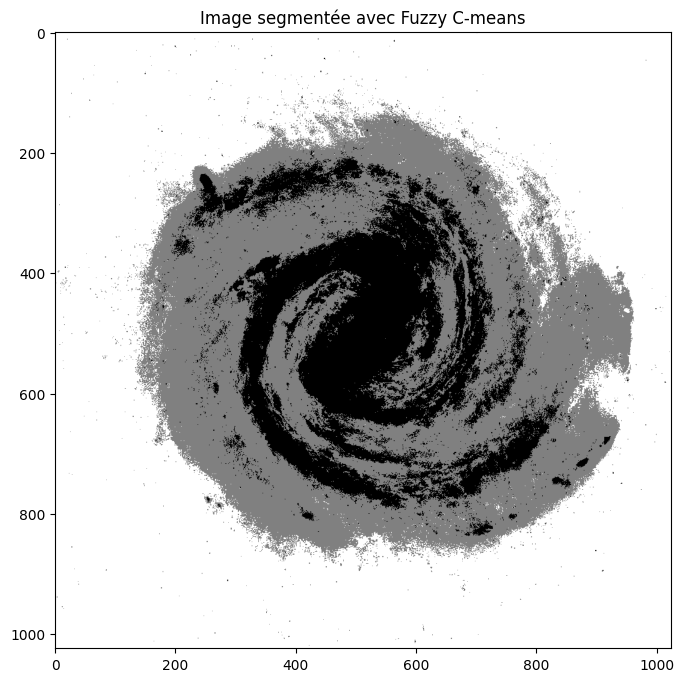

In [24]:
#Application de FCM sur les pixels de l'image
U, centers, obj = fcm(pixels, n_clusters, m, max_iter, epsilon)

#Affichage des résultats
#Assigner chaque pixel au cluster avec le plus grand degré d'appartenance
labels = np.argmax(U, axis=1)

#Reshape des étiquettes de clusters à la forme originale de l'image
segmented_image = labels.reshape(resized_image.shape)

plt.figure(figsize=(8, 8))
plt.imshow(segmented_image, cmap='gray')
plt.title('Image segmentée avec Fuzzy C-means')
plt.show()


# Heatmap

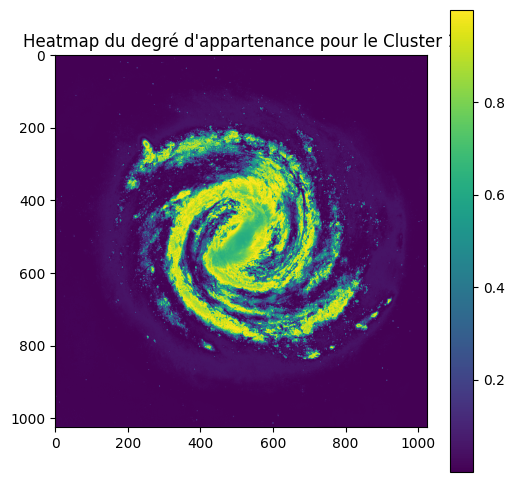

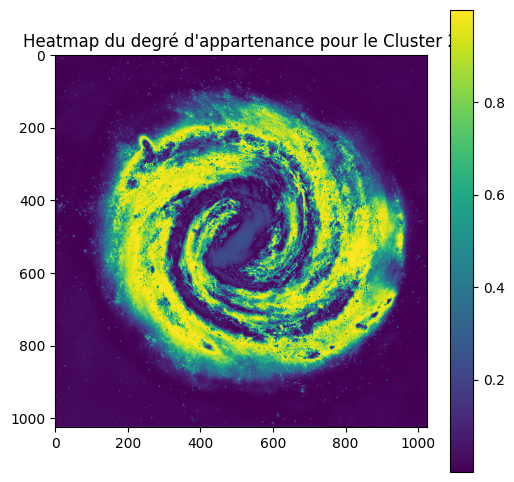

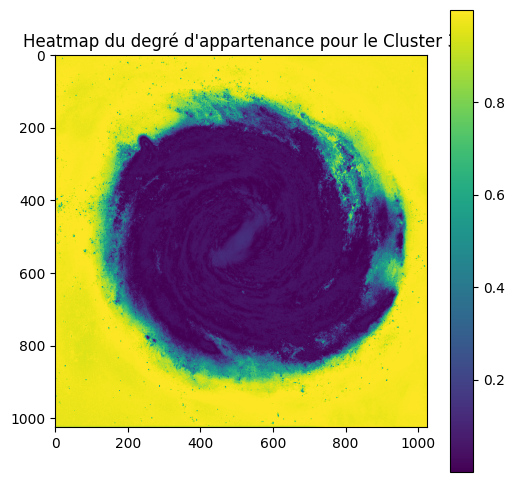

In [25]:
#Création de heatmaps pour chaque cluster
def plot_heatmaps(U, original_shape, n_clusters):
    for i in range(n_clusters):
        #U contient une ligne pour chaque pixel et une colonne pour chaque cluster
        #Nous prenons la colonne i et la reshapons à la taille de l'image
        membership_degrees = U[:, i].reshape(original_shape)  # Prendre la colonne des degrés d'appartenance du cluster i

        #Affichage de la heatmap pour le cluster i
        plt.figure(figsize=(6, 6))
        plt.imshow(membership_degrees, cmap='viridis')
        plt.colorbar()
        plt.title(f'Heatmap du degré d\'appartenance pour le Cluster {i+1}')
        plt.show()

plot_heatmaps(U, resized_image.shape, n_clusters)
